### PyTorch Tutorial

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
training_data = datasets.FashionMNIST(
        root = "data",
        train = True,
        download = True,
        transform = ToTensor(),
)

test_data = datasets.FashionMNIST(
        root = "data",
        train = False,
        download = True,
        transform = ToTensor(),
)

In [ ]:
batch_size = 64
#create data loaders
train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

#### Creating Models

In [ ]:
# Get cpu, gpu or mps device for training

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

#Define model

#Neural Network class, inheriting from nn.Module
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)


### Optimizing the Model Parameters

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [ ]:
def train(dataloader, model, loss_fun, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)

#Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

#Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
        loss, current = loss.item(), (batch + 1) * len(X)
        print(f"loss: {loss:>7f} [{current:> 5d} / {size :> 5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct) :>0.1}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')


# HW2


### Sources that I used:
- How to Perform One-Hot Encoding in Python: https://www.statology.org/one-hot-encoding-in-python/
- Deep Learning with PyTorch: A 60 Minute Blitz: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
- Neural Networks: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py
- MNIST Sample Code: https://github.com/pytorch/examples/blob/main/mnist/main.py
- Imagenet Sample Code: https://github.com/pytorch/examples/blob/main/imagenet/main.py
- What is a neural network IBM: https://www.ibm.com/topics/neural-networks
- How to build a neural network in seven steps: https://www.neuraldesigner.com/learning/user-guide/design-a-neural-network/
- One Layer Neural Network From Scratch — Classification: https://buse-koseoglu13.medium.com/one-layer-neural-network-from-scratch-classification-b6c71481f992
- Building a Single Layer Neural Network in PyTorch: https://machinelearningmastery.com/building-a-single-layer-neural-network-in-pytorch/
- Understand the Impact of Learning Rate on Neural Network Performance: https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
- Learning Rate in Machine Learning: https://www.deepchecks.com/glossary/learning-rate-in-machine-learning/
- Convolutional Neural Networks (CNNs) and Layer Types: https://pyimagesearch.com/2021/05/14/convolutional-neural-networks-cnns-and-layer-types/
- Convolutional Neural Network (CNN): https://www.tensorflow.org/tutorials/images/cnn
- Convolutional Neural Network Tutorial: https://www.simplilearn.com/tutorials/deep-learning-tutorial/convolutional-neural-network
- Activation Functions: Sigmoid, Tanh, ReLU, Leaky ReLU, Softmax: https://medium.com/@cmukesh8688/activation-functions-sigmoid-tanh-relu-leaky-relu-softmax-50d3778dcea5
- Relu vs Sigmoid vs Softmax as hidden layer neurons: https://stats.stackexchange.com/questions/218752/relu-vs-sigmoid-vs-softmax-as-hidden-layer-neurons
- A Gentle Introduction to the Rectified Linear Unit (ReLU): https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
- An Introduction to the ReLU Activation Function: https://builtin.com/machine-learning/relu-activation-function
- First neural network for beginners explained (with code): https://towardsdatascience.com/first-neural-network-for-beginners-explained-with-code-4cfd37e06eaf
- Training a Classifier: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
- Learning PyTorch with Examples: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
- Build the Neural Network: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html


1. Run the tutorial code out of the box and make sure you get reasonable results. You will report these
results in Section 4, so no report needed here.

2.  Change the code to have only a single fully connected layer. The model will have a single layer that
connects the input to the output. What is the number of parameters? In PyTorch, ”nn.Linear” can
be used for fully connected layer.

Files already downloaded and verified
Files already downloaded and verified


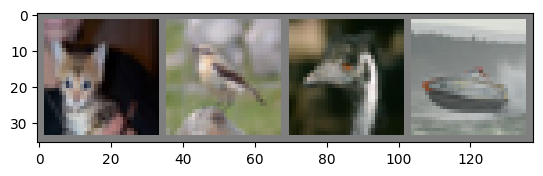

  cat  bird  bird  ship
Epoch 1/10, Loss: 2.099, Train Accuracy: 0.37, Test Accuracy: 0.40
Epoch 2/10, Loss: 2.057, Train Accuracy: 0.41, Test Accuracy: 0.41
Epoch 3/10, Loss: 2.044, Train Accuracy: 0.42, Test Accuracy: 0.41
Epoch 4/10, Loss: 2.036, Train Accuracy: 0.43, Test Accuracy: 0.41
Epoch 5/10, Loss: 2.030, Train Accuracy: 0.43, Test Accuracy: 0.41
Epoch 6/10, Loss: 2.025, Train Accuracy: 0.44, Test Accuracy: 0.41
Epoch 7/10, Loss: 2.022, Train Accuracy: 0.44, Test Accuracy: 0.42
Epoch 8/10, Loss: 2.018, Train Accuracy: 0.45, Test Accuracy: 0.42
Epoch 9/10, Loss: 2.015, Train Accuracy: 0.45, Test Accuracy: 0.41
Epoch 10/10, Loss: 2.013, Train Accuracy: 0.45, Test Accuracy: 0.41


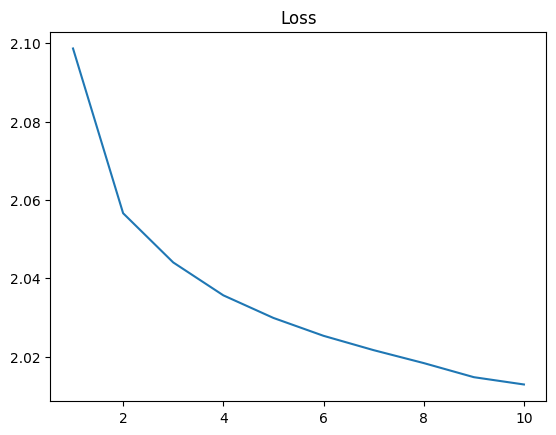

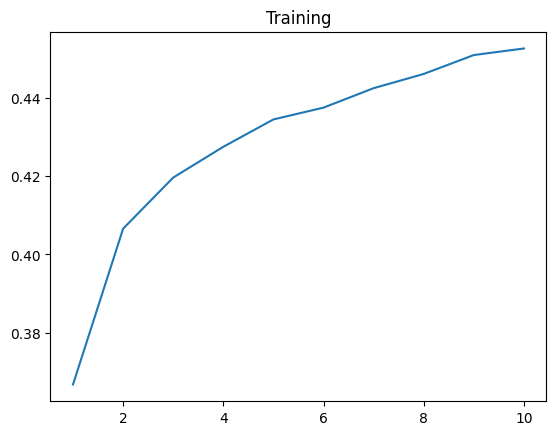

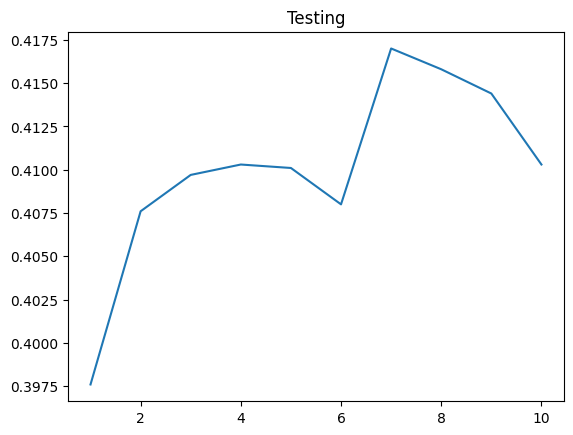

Finished Training


In [4]:
# -*- coding: utf-8 -*-

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

import torch.nn as nn
import torch.nn.functional as F

class SingleLayerNet(nn.Module):
    def __init__(self):
        super(SingleLayerNet, self).__init__()
        self.fc = nn.Linear(3 * 32 * 32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = F.softmax(x, dim=1)
        return x

net = SingleLayerNet()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

losses, train_accuracies, test_accuracies = [], [], []
epochs = 10

for epoch in range(epochs):

    running_loss = 0.0
    accurate_training = 0
    total_training = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #loss
        running_loss += loss.item()

        #accuracy
        _, predicted = torch.max(outputs, 1)
        total_training += labels.size(0)
        accurate_training += (predicted == labels).sum().item()

    #log loss and accuracy (averaged)
    training_loss = running_loss / len(trainloader)
    training_accuracy = accurate_training / total_training
    losses.append(training_loss)
    train_accuracies.append(training_accuracy)

    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {training_loss:.3f}, Train Accuracy: {training_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')

plt.plot(range(1, epochs + 1), losses)
plt.title("Loss")
plt.show()


plt.plot(range(1, epochs + 1), train_accuracies)
plt.title("Training")
plt.show()


plt.plot(range(1, epochs + 1), test_accuracies)
plt.title("Testing")
plt.show()


print('Finished Training')

By definition, a neural network is a function that works to approximate another function if inputted with some set of parameters. In a single layer neural network, we see an approximation of the function that makes the data lineraly seperable. There is only one layer of input nodes that can send the weighted inputs to another layer of receiving nodes. These single-layer neural networks can be considered with the class of feedforward neural networks (info is traveling in one direction). The number of parameters in this case will be the total number of weights added with the total number of biases. If we calculate this, we see that the inputs multiply out to 3072 (3 * 32 * 32) and there are 10 outputs. 3072 * 10 is equal to 30720 and if we add the biases for each output (10), we get 30720 + 10 = 30730.

3. Change the code to have multiple fully connected layers. Try having a layer from input to 110 neurons
and then a layer to 74 neurons, and finally a layer to 10 neurons, one for each category. What happens
if you do not use ReLU? Describe why

Files already downloaded and verified
Files already downloaded and verified


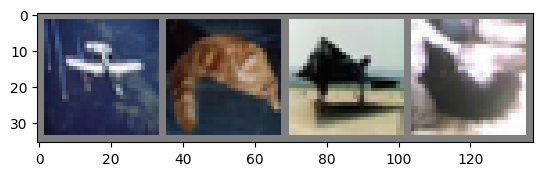

plane   cat plane   cat
Epoch 1/10, Loss: 2.175, Train Accuracy: 0.28, Test Accuracy: 0.37
Epoch 2/10, Loss: 2.071, Train Accuracy: 0.39, Test Accuracy: 0.41
Epoch 3/10, Loss: 2.033, Train Accuracy: 0.42, Test Accuracy: 0.43
Epoch 4/10, Loss: 2.009, Train Accuracy: 0.45, Test Accuracy: 0.45
Epoch 5/10, Loss: 1.991, Train Accuracy: 0.47, Test Accuracy: 0.46
Epoch 6/10, Loss: 1.976, Train Accuracy: 0.48, Test Accuracy: 0.47
Epoch 7/10, Loss: 1.963, Train Accuracy: 0.50, Test Accuracy: 0.48
Epoch 8/10, Loss: 1.951, Train Accuracy: 0.51, Test Accuracy: 0.48
Epoch 9/10, Loss: 1.942, Train Accuracy: 0.52, Test Accuracy: 0.48
Epoch 10/10, Loss: 1.932, Train Accuracy: 0.53, Test Accuracy: 0.49


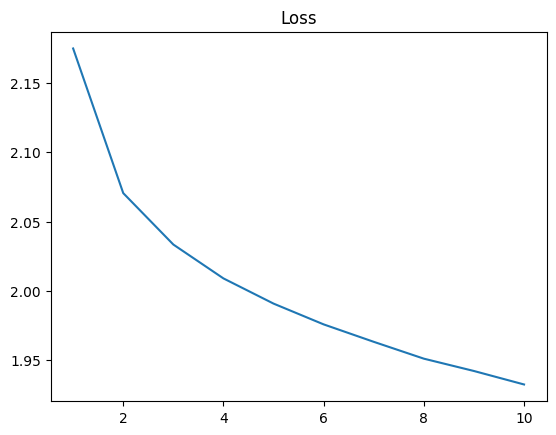

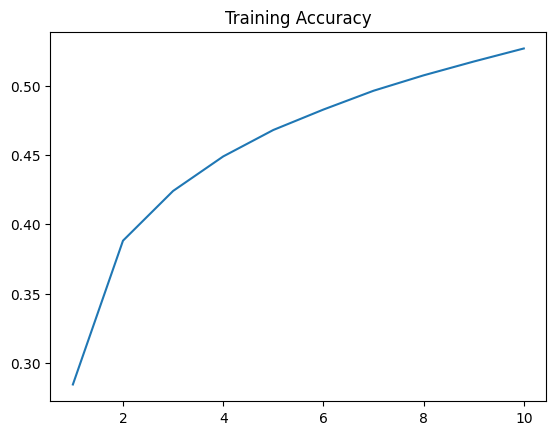

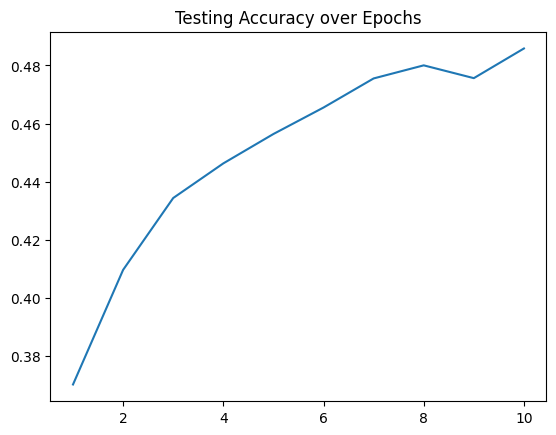

Finished Training


In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

########################################################################
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np



def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)


imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


import torch.nn as nn
import torch.nn.functional as F


class MultipleFC(nn.Module):
    def __init__(self):
        super(MultipleFC, self).__init__()
        self.fc = nn.Linear(3 * 32 * 32, 110)
        self.fc1 = nn.Linear(110, 74)
        self.fc2 = nn.Linear(74,10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

net = MultipleFC()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


losses, train_accuracies, test_accuracies = [], [], []
epochs = 10

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    accurate_training = 0
    total_training = 0

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data


        optimizer.zero_grad()


        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_training += labels.size(0)
        accurate_training += (predicted == labels).sum().item()

    training_loss = running_loss / len(trainloader)
    training_accuracy = accurate_training / total_training
    losses.append(training_loss)
    train_accuracies.append(training_accuracy)

    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {training_loss:.3f}, Train Accuracy: {training_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')



plt.plot(range(1, epochs + 1), losses, label="Training Loss")
plt.title("Loss")
plt.show()


plt.plot(range(1, epochs + 1), train_accuracies, label="Training Accuracy")
plt.title("Training Accuracy")
plt.show()


plt.plot(range(1, epochs + 1), test_accuracies, label="Testing Accuracy")
plt.title("Testing Accuracy over Epochs")
plt.show()


print('Finished Training')

ReLU activation function is used in neural networks primarily to introduce a nonlinearity feature that helps identify and classify images in datasets. According to machinelearningmastery.com, ReLU is a piecewise lineear funciton that outputs the input directly if positive or zero if it is negative. With the first layer of the neural network, we can only perform a linear transformation on the input; the second layer can perform a non-linear transformation. By having a non-linear function in the second layer, the network can learn more complex representations of the data.

Without ReLU, the network can only learn linear relationships between each of the input and outputs. In the first layer of the neural network here, we started out with an input of 110 neurons (going from 3072 to 110). The next layer went from 110 to 74, and the next was 74 to 10. If we do not use ReLU, we are limited in how we can identify patterns that are more complex because there are only linear combinations that can be computed.

4.  Change the code by adding two convolutional layers along with maxpooling layers before the fullyconnected layers. This will be similar to the example in the tutorial. Use this model for the following sections.

Files already downloaded and verified
Files already downloaded and verified


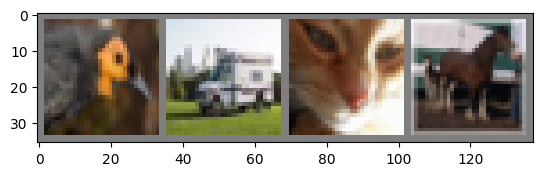

 bird truck   cat horse
Epoch 1/10, Loss: 1.957, Train Accuracy: 0.26, Test Accuracy: 0.45
Epoch 2/10, Loss: 1.402, Train Accuracy: 0.49, Test Accuracy: 0.53
Epoch 3/10, Loss: 1.181, Train Accuracy: 0.58, Test Accuracy: 0.62
Epoch 4/10, Loss: 1.048, Train Accuracy: 0.63, Test Accuracy: 0.64
Epoch 5/10, Loss: 0.952, Train Accuracy: 0.66, Test Accuracy: 0.66
Epoch 6/10, Loss: 0.877, Train Accuracy: 0.69, Test Accuracy: 0.67
Epoch 7/10, Loss: 0.822, Train Accuracy: 0.71, Test Accuracy: 0.67
Epoch 8/10, Loss: 0.771, Train Accuracy: 0.73, Test Accuracy: 0.68
Epoch 9/10, Loss: 0.736, Train Accuracy: 0.74, Test Accuracy: 0.68
Epoch 10/10, Loss: 0.697, Train Accuracy: 0.75, Test Accuracy: 0.65


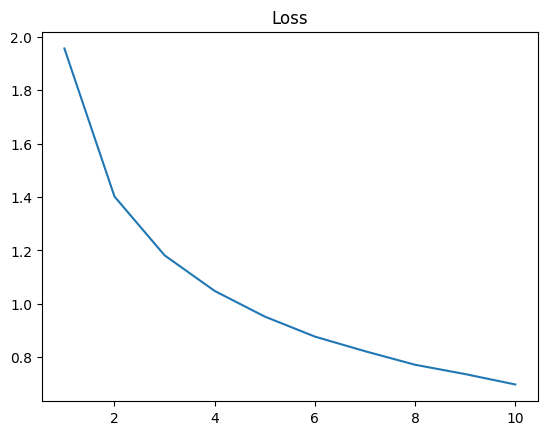

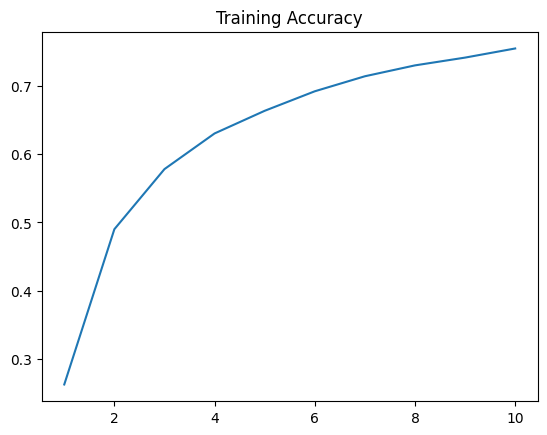

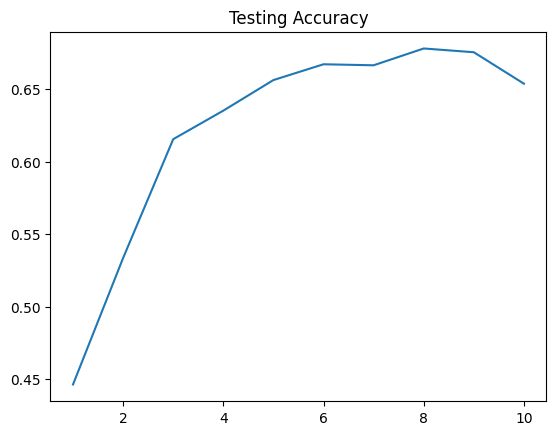

Finished Training


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Data transformation
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load the CIFAR-10 training and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


class ConvolutionalNN(nn.Module):
    def __init__(self):
        super(ConvolutionalNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)


        self.fc1 = nn.Linear(64 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        c1 = F.relu(self.conv1(input))
        s2 = F.max_pool2d(c1, (2, 2))

        c3 = F.relu(self.conv2(s2))
        s4 = F.max_pool2d(c3, 2)

        c5 = F.relu(self.conv3(s4))
        s6 = F.max_pool2d(c5, 2)

        c7 = F.relu(self.conv4(s6))
        s8 = torch.flatten(c7, 1)  # Flatten for the fully connected layers

        f9 = F.relu(self.fc1(s8))
        f10 = F.relu(self.fc2(f9))
        output = self.fc3(f10)

        return output


net = ConvolutionalNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


losses, train_accuracies, test_accuracies = [], [], []
epochs = 10


for epoch in range(epochs):
    running_loss = 0.0
    accurate_training = 0
    total_training = 0


    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_training += labels.size(0)
        accurate_training += (predicted == labels).sum().item()


    training_loss = running_loss / len(trainloader)
    training_accuracy = accurate_training / total_training
    losses.append(training_loss)
    train_accuracies.append(training_accuracy)


    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {training_loss:.3f}, Train Accuracy: {training_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')


plt.plot(range(1, epochs + 1), losses)
plt.title("Loss")
plt.show()

plt.plot(range(1, epochs + 1), train_accuracies)
plt.title("Training Accuracy")
plt.show()

plt.plot(range(1, epochs + 1), test_accuracies)
plt.title("Testing Accuracy")
plt.show()


print('Finished Training')


5. Try multiple batch sizes to see the effect and describe the findings. Please use batch size of 1, 4, and
1000, If 1000 does not fit into the memory of your machine, please feel free to reduce it to the largest
possible number.

Files already downloaded and verified
Files already downloaded and verified
Batch Size is 1
Epoch 1/10, Loss: 1.745, Train Accuracy: 0.35, Test Accuracy: 0.43
Epoch 2/10, Loss: 1.464, Train Accuracy: 0.47, Test Accuracy: 0.48
Epoch 3/10, Loss: 1.447, Train Accuracy: 0.49, Test Accuracy: 0.48
Epoch 4/10, Loss: 1.483, Train Accuracy: 0.48, Test Accuracy: 0.46
Epoch 5/10, Loss: 1.538, Train Accuracy: 0.46, Test Accuracy: 0.46
Epoch 6/10, Loss: 1.616, Train Accuracy: 0.44, Test Accuracy: 0.45
Epoch 7/10, Loss: 1.649, Train Accuracy: 0.43, Test Accuracy: 0.38
Epoch 8/10, Loss: 1.703, Train Accuracy: 0.40, Test Accuracy: 0.38
Epoch 9/10, Loss: 1.730, Train Accuracy: 0.39, Test Accuracy: 0.32
Epoch 10/10, Loss: 1.756, Train Accuracy: 0.38, Test Accuracy: 0.36


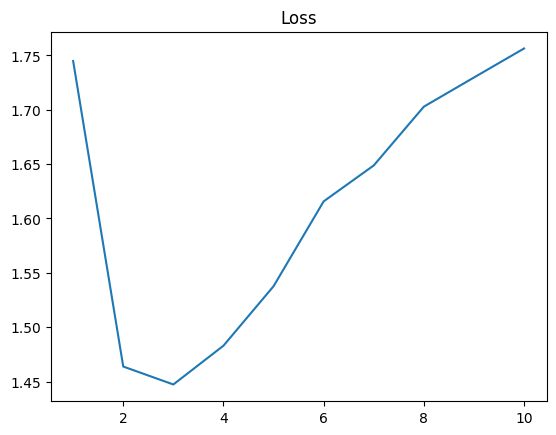

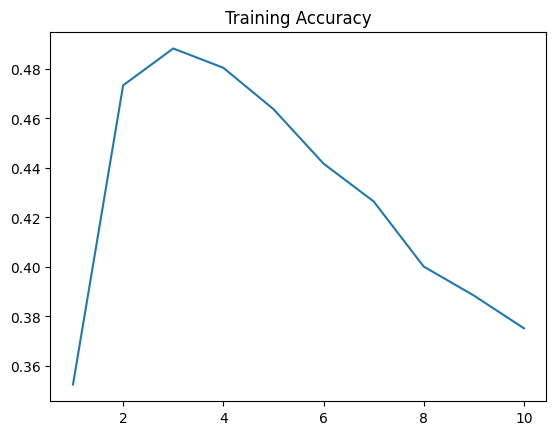

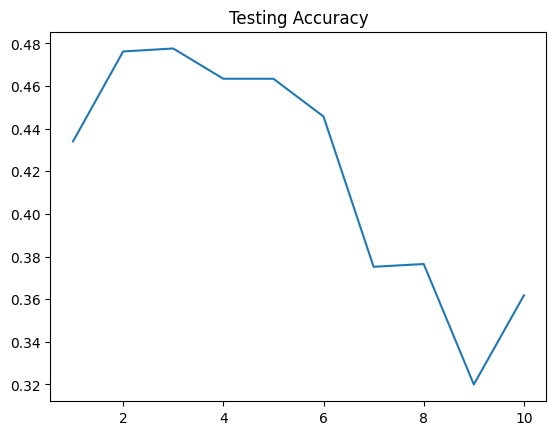

Batch Size is 4
Epoch 1/10, Loss: 1.929, Train Accuracy: 0.27, Test Accuracy: 0.43
Epoch 2/10, Loss: 1.432, Train Accuracy: 0.48, Test Accuracy: 0.52
Epoch 3/10, Loss: 1.227, Train Accuracy: 0.56, Test Accuracy: 0.59
Epoch 4/10, Loss: 1.087, Train Accuracy: 0.62, Test Accuracy: 0.63
Epoch 5/10, Loss: 0.987, Train Accuracy: 0.65, Test Accuracy: 0.64
Epoch 6/10, Loss: 0.916, Train Accuracy: 0.68, Test Accuracy: 0.63
Epoch 7/10, Loss: 0.860, Train Accuracy: 0.70, Test Accuracy: 0.65
Epoch 8/10, Loss: 0.808, Train Accuracy: 0.72, Test Accuracy: 0.65
Epoch 9/10, Loss: 0.765, Train Accuracy: 0.73, Test Accuracy: 0.66
Epoch 10/10, Loss: 0.732, Train Accuracy: 0.74, Test Accuracy: 0.64


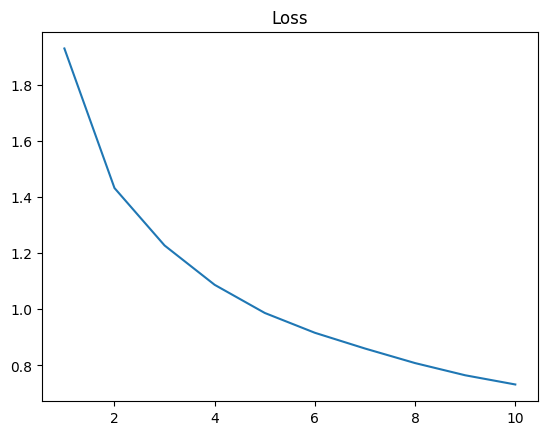

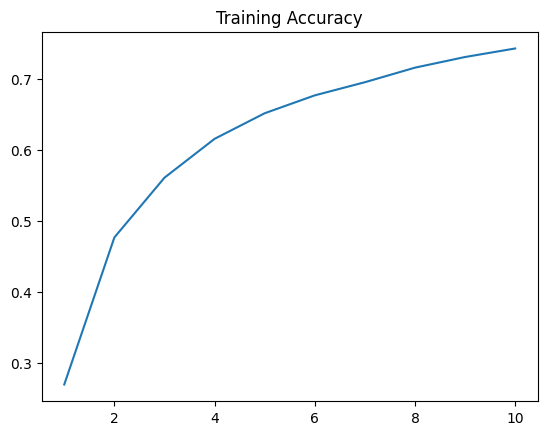

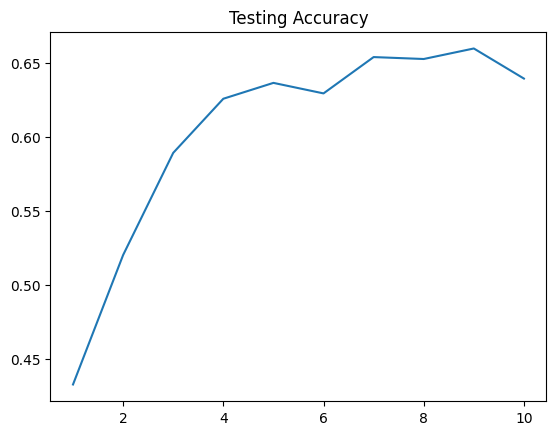

Batch Size is 1000
Epoch 1/10, Loss: 2.305, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 2/10, Loss: 2.305, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 3/10, Loss: 2.304, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 4/10, Loss: 2.304, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 5/10, Loss: 2.304, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 6/10, Loss: 2.304, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 7/10, Loss: 2.304, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 8/10, Loss: 2.303, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 9/10, Loss: 2.303, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 10/10, Loss: 2.303, Train Accuracy: 0.10, Test Accuracy: 0.10


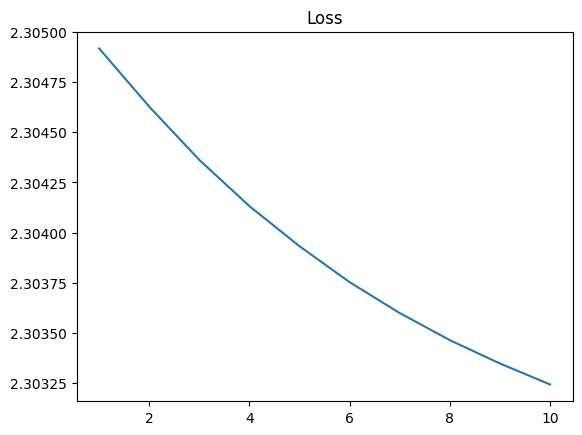

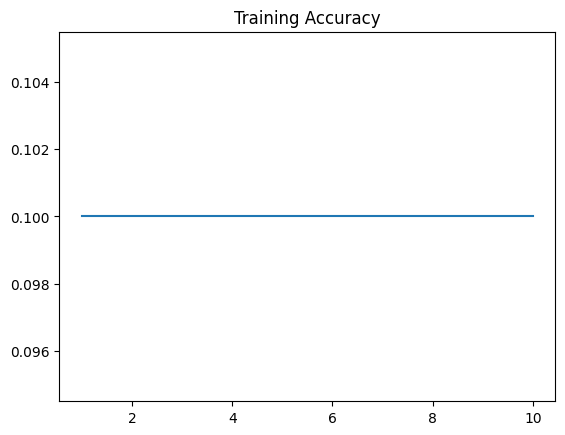

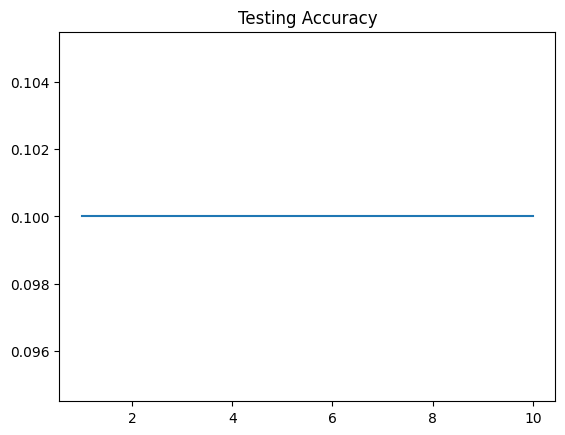

Finished Training


In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


class ConvolutionalNN(nn.Module):
    def __init__(self):
        super(ConvolutionalNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)

        self.fc1 = nn.Linear(64 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        c1 = F.relu(self.conv1(input))
        s2 = F.max_pool2d(c1, (2, 2))

        c3 = F.relu(self.conv2(s2))
        s4 = F.max_pool2d(c3, 2)

        c5 = F.relu(self.conv3(s4))
        s6 = F.max_pool2d(c5, 2)

        c7 = F.relu(self.conv4(s6))
        s8 = torch.flatten(c7, 1)

        f9 = F.relu(self.fc1(s8))
        f10 = F.relu(self.fc2(f9))
        output = self.fc3(f10)

        return output


batch_sizes = [1, 4, 1000]

for batch_size in batch_sizes:
    print(f"Batch Size is {batch_size}")

    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

    net = ConvolutionalNN()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    losses, train_accuracies, test_accuracies = [], [], []
    epochs = 10

    for epoch in range(epochs):
        running_loss = 0.0
        accurate_training = 0
        total_training = 0

        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_training += labels.size(0)
            accurate_training += (predicted == labels).sum().item()

        training_loss = running_loss / len(trainloader)
        training_accuracy = accurate_training / total_training
        losses.append(training_loss)
        train_accuracies.append(training_accuracy)

        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = correct_test / total_test
        test_accuracies.append(test_accuracy)

        print(f'Epoch {epoch+1}/{epochs}, Loss: {training_loss:.3f}, Train Accuracy: {training_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')

    plt.plot(range(1, epochs + 1), losses)
    plt.title("Loss")
    plt.show()

    plt.plot(range(1, epochs + 1), train_accuracies)
    plt.title("Training Accuracy")
    plt.show()

    plt.plot(range(1, epochs + 1), test_accuracies)
    plt.title("Testing Accuracy")
    plt.show()

print('Finished Training')


Batch size is defined to be the number of samples that are able to be processed in one iteration of a model when training (forward/backward pass). Batch size is a hyperparameter of gradient descent. When looking to train a model, it is important to find the batch size that fits the model properly. There are both advantages and disadvantages of using a batch size that is less than the number of samples. For advantages, less memory is needed to run and the networks train faster. However, the smaller batches have less samples to work with and the less accurate the estimate of the gradient will be. In this case when running the code, it looks like the best fit would be a size of 4.


Batch size 1 (sample of 1):
training was incredibly slow, strange/unreasonable results, statistically significant training accuracy (was very low)

I see that the training loss fluctuates around the value of 1.746. Train accuracy has a larger margin, ranging from 36% to about 48%. The test accuracy fluctuates between the range of 33% to 48%. As the number of epochs gets closer to 10, we see that the training loss is increasing, and training accuracy and testing accuracy are decreasing significantly. There is a high level of variance in the gradient because of the batch size which is probably why the learning is so inconsistent. It is possible that overfitting took place because the model performed very poorly on a well known dataset.

Batch size 4 (sample of 4):
training accuracy was more accurate compared to batch size of 1, accuracy results looks more reasonable
I see that the training loss was more steady and the training accuracy and test accuracy were more consistent as well. Since the batch size has increased, we have more averaging that is being done which in turn creates more effective learning and better accuracy, even though we only have 10 epochs. This batch size seems the most fitting one to use because 1 is too small and is providing strange results, and 1000 is providing results that seem like they could be generated randomly.

Batch size 1000 (sample of 1000):
The graphs looks more smooth but they generalized results. I think that the reason two of my graphs were constant were because they were being averaged because of the significantly large batch size. I think my graph might have plateaued because I have never seen a constant line for training accuracy and testing accuracy graphs. Both the training and test accuracies were a constant line at 10% which seemed incredibly unreliable and showed just how a large batch size oftentimes is not the best choice for a model.

6. Try multiple learning rates to see the effect and describe the findings. Please use learning rates of 10,
0.1, 0.01, and 0.001.

Files already downloaded and verified
Files already downloaded and verified

Training with learning rate: 10
Epoch 1/10, Loss: nan, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 2/10, Loss: nan, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 3/10, Loss: nan, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 4/10, Loss: nan, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 5/10, Loss: nan, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 6/10, Loss: nan, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 7/10, Loss: nan, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 8/10, Loss: nan, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 9/10, Loss: nan, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 10/10, Loss: nan, Train Accuracy: 0.10, Test Accuracy: 0.10


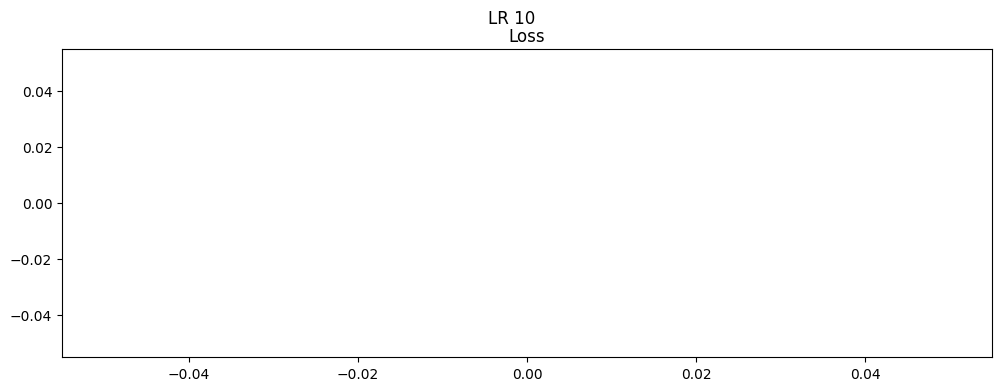

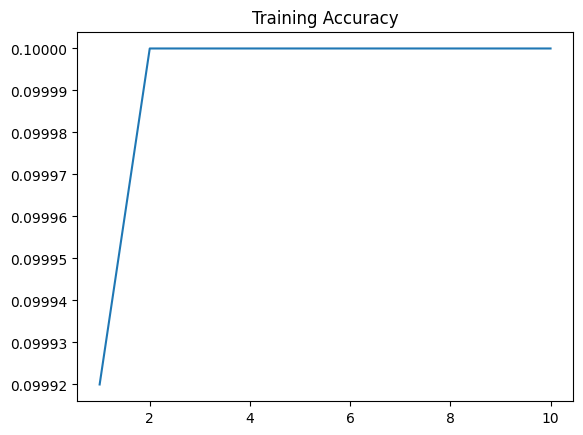

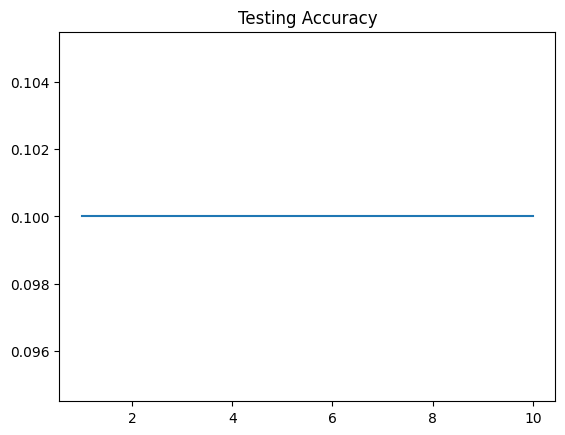


Training with learning rate: 0.1
Epoch 1/10, Loss: 2.359, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 2/10, Loss: 2.358, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 3/10, Loss: 2.360, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 4/10, Loss: 2.359, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 5/10, Loss: 2.360, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 6/10, Loss: 2.360, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 7/10, Loss: 2.359, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 8/10, Loss: 2.359, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 9/10, Loss: 2.361, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 10/10, Loss: 2.359, Train Accuracy: 0.10, Test Accuracy: 0.10


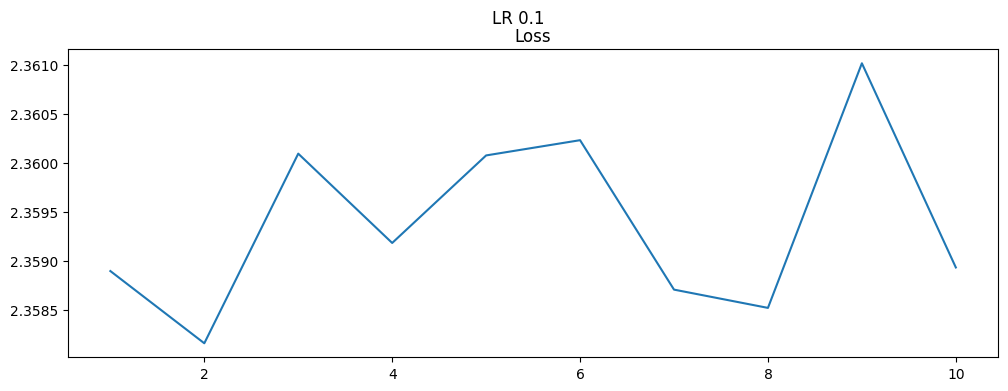

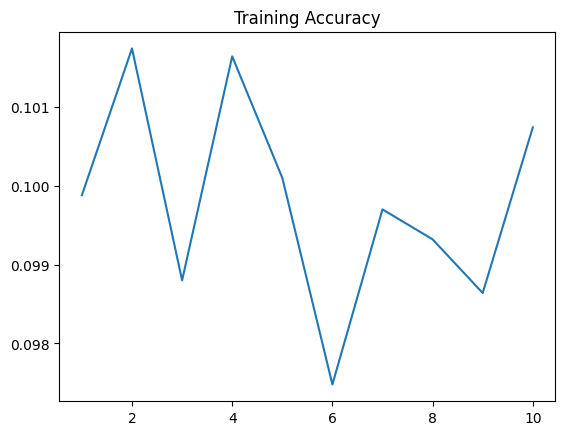

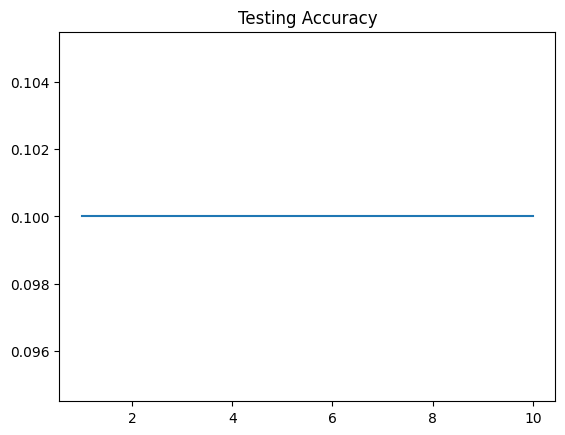


Training with learning rate: 0.01
Epoch 1/10, Loss: 1.992, Train Accuracy: 0.25, Test Accuracy: 0.29
Epoch 2/10, Loss: 2.081, Train Accuracy: 0.21, Test Accuracy: 0.12
Epoch 3/10, Loss: 2.099, Train Accuracy: 0.20, Test Accuracy: 0.20
Epoch 4/10, Loss: 2.252, Train Accuracy: 0.13, Test Accuracy: 0.10
Epoch 5/10, Loss: 2.308, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 6/10, Loss: 2.308, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 7/10, Loss: 2.309, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 8/10, Loss: 2.308, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 9/10, Loss: 2.308, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 10/10, Loss: 2.308, Train Accuracy: 0.10, Test Accuracy: 0.10


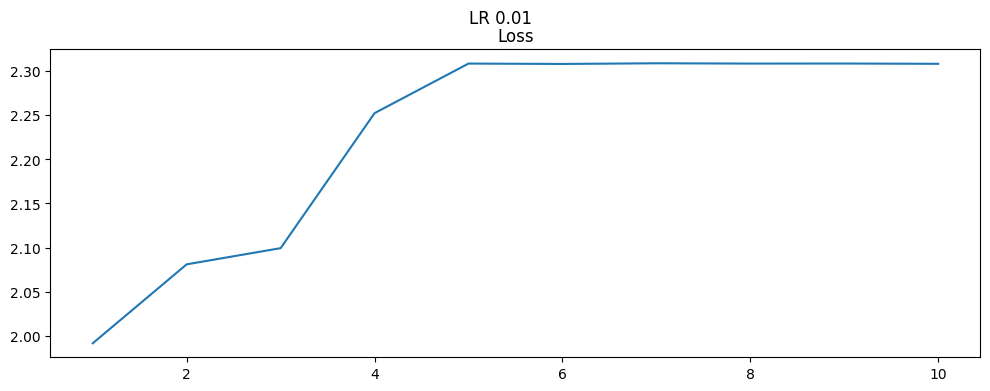

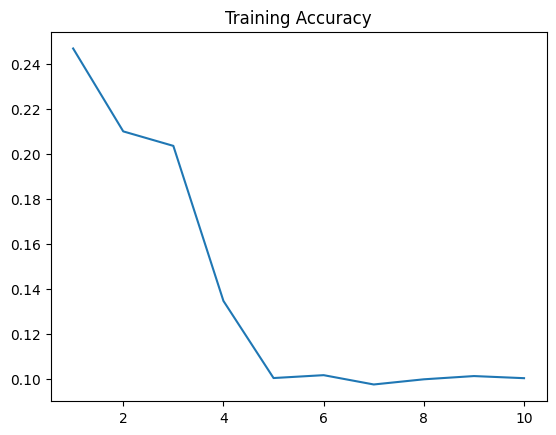

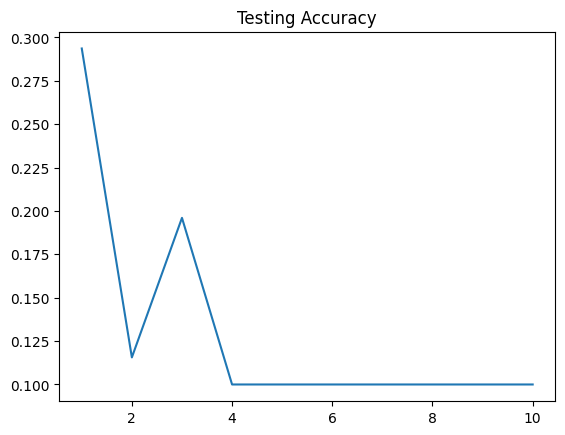


Training with learning rate: 0.001
Epoch 1/10, Loss: 1.860, Train Accuracy: 0.30, Test Accuracy: 0.47
Epoch 2/10, Loss: 1.368, Train Accuracy: 0.51, Test Accuracy: 0.56
Epoch 3/10, Loss: 1.153, Train Accuracy: 0.59, Test Accuracy: 0.60
Epoch 4/10, Loss: 1.021, Train Accuracy: 0.64, Test Accuracy: 0.63
Epoch 5/10, Loss: 0.937, Train Accuracy: 0.67, Test Accuracy: 0.66
Epoch 6/10, Loss: 0.871, Train Accuracy: 0.69, Test Accuracy: 0.65
Epoch 7/10, Loss: 0.818, Train Accuracy: 0.71, Test Accuracy: 0.67
Epoch 8/10, Loss: 0.768, Train Accuracy: 0.73, Test Accuracy: 0.64
Epoch 9/10, Loss: 0.736, Train Accuracy: 0.74, Test Accuracy: 0.66
Epoch 10/10, Loss: 0.701, Train Accuracy: 0.75, Test Accuracy: 0.65


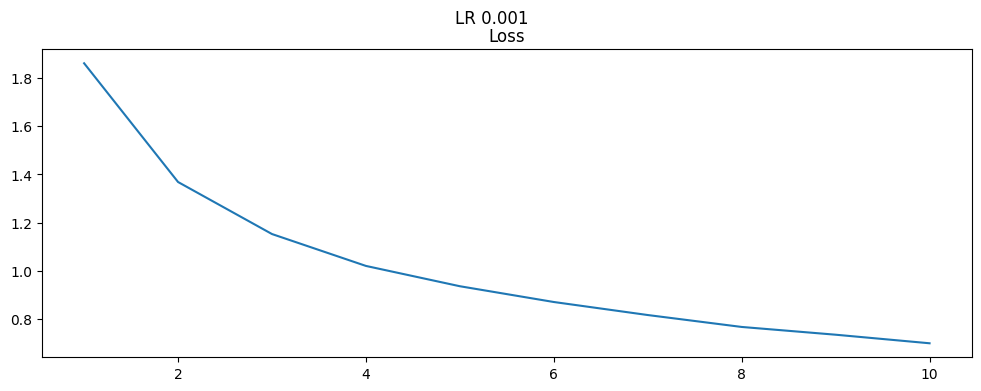

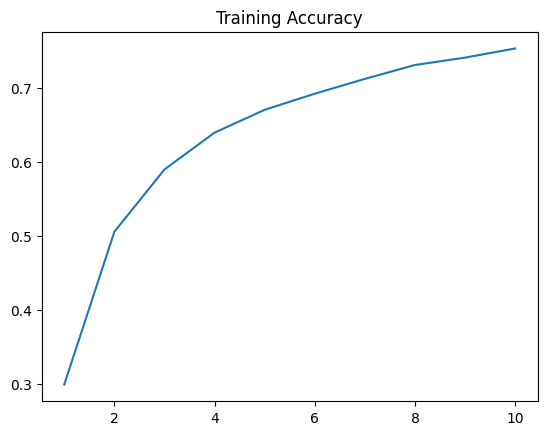

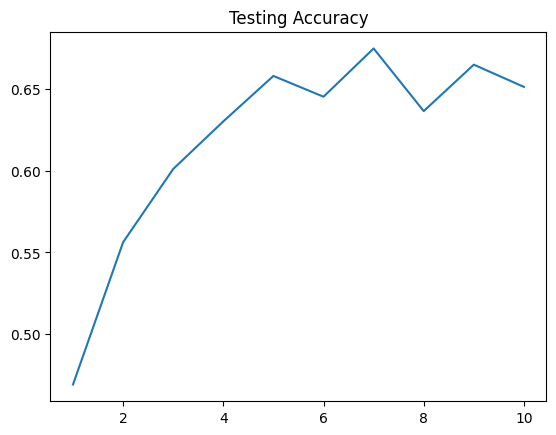

Finished Training


In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

class ConvolutionalNN(nn.Module):
    def __init__(self):
        super(ConvolutionalNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)

        self.fc1 = nn.Linear(64 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        c1 = F.relu(self.conv1(input))
        s2 = F.max_pool2d(c1, (2, 2))
        c3 = F.relu(self.conv2(s2))
        s4 = F.max_pool2d(c3, 2)
        c5 = F.relu(self.conv3(s4))
        s6 = F.max_pool2d(c5, 2)
        c7 = F.relu(self.conv4(s6))
        s8 = torch.flatten(c7, 1)
        f9 = F.relu(self.fc1(s8))
        f10 = F.relu(self.fc2(f9))
        output = self.fc3(f10)
        return output

learning_rates = [10, 0.1, 0.01, 0.001]
epochs = 10

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    net = ConvolutionalNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

    losses, train_accuracies, test_accuracies = [], [], []

    for epoch in range(epochs):
        running_loss = 0.0
        accurate_training = 0
        total_training = 0

        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_training += labels.size(0)
            accurate_training += (predicted == labels).sum().item()

        training_loss = running_loss / len(trainloader)
        training_accuracy = accurate_training / total_training
        losses.append(training_loss)
        train_accuracies.append(training_accuracy)

        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = correct_test / total_test
        test_accuracies.append(test_accuracy)

        print(f'Epoch {epoch+1}/{epochs}, Loss: {training_loss:.3f}, Train Accuracy: {training_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')

    plt.figure(figsize=(12, 4))
    plt.suptitle(f"LR {lr}")


    plt.plot(range(1, epochs + 1), losses)
    plt.title("Loss")
    plt.show()

    plt.plot(range(1, epochs + 1), train_accuracies)
    plt.title("Training Accuracy")
    plt.show()

    plt.plot(range(1, epochs + 1), test_accuracies)
    plt.title("Testing Accuracy")
    plt.show()


print("Finished Training")


According to machinelearningmastery, learning rate controls how quickly a model can adapt to a problem. If we have a smaller learning rate, we see that there are more epochs required to run. If we have a larger learning rate, we have rapid changes and require a lot fewer training epochs. A learning rate that is too big (like 10) can cause NaN; the rate can cause the model to converge quickly and then lead to a suboptimal solution. A learning rate that is too small can also cause the process to get stuck. Oftentimes, the learning rate is one of the most important hyperparameters when building a model. If the learning rate is too low, the model will converge very slowly. If the learning rate is too high, the model's convergence will be unstable and training loss may bounce around, it can also get stuck at a suboptimal level (like mentioned above).  

Learning rate of 10:
- "With a relatively large lr, weights might become so large and model diverges" (Piazza, Question 72)
- Outputs were incredibly strange (seems like this is equal to if the model was randomly guessing)
    - loss = NaN, Train accuracy = 10%, Test accuracy = 10%
    - learning rate resulted in large gradient descent (if we see function diverging)

Learning rate of 0.1:
- model is learning now, still seeing some strange patterns similar to when lr was equal to 10
- loss is no longer NaN, it is 2.359-2.361
- oscillations are not that smooth yet
- better than learning rate of 10

Learning rate of 0.01:
- model is more stable
- training and test accuracy is improving
- loss fluctuates between 1.993 and 2.219
- train and test accuracy have increased, in higher ranges compared to prior 0.1 learning rate
- less fluctuating compared to 0.1 and 10 learning rates

Learning rate of 0.001:
- incredibly slow running time
- loss was decreasing
- accuracy increased, convergence was slower
- Significantly smaller loss, ranging from 1.826 to 0.707
- train accuracy is significantly higher from anywhere to 30% - 70%
- testing accuracy is higher, more consistent results that are in the 60% range

7. Please add some data augmentation to avoid overfitting. Note that you need to do this only for the
trainnig and not the testing. You may use line 233-253 from Imagenet sample code:
https://github.com/pytorch/examples/blob/master/imagenet/main.py
”RandomResizedCrop” samples a random patch from the image to train the model on. ”RandomHorizontalFlip” flips randomly chosen images horizontally

Files already downloaded and verified
Files already downloaded and verified


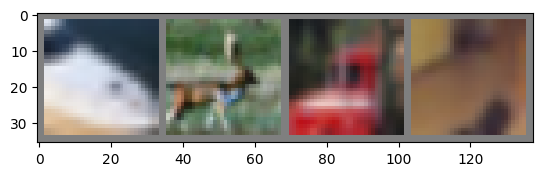

 ship  deer truck   cat
Epoch 1/10, Loss: 2.154, Train Accuracy: 0.18, Test Accuracy: 0.33
Epoch 2/10, Loss: 1.809, Train Accuracy: 0.32, Test Accuracy: 0.43
Epoch 3/10, Loss: 1.693, Train Accuracy: 0.38, Test Accuracy: 0.49
Epoch 4/10, Loss: 1.608, Train Accuracy: 0.41, Test Accuracy: 0.51
Epoch 5/10, Loss: 1.544, Train Accuracy: 0.44, Test Accuracy: 0.54
Epoch 6/10, Loss: 1.492, Train Accuracy: 0.46, Test Accuracy: 0.58
Epoch 7/10, Loss: 1.462, Train Accuracy: 0.47, Test Accuracy: 0.56
Epoch 8/10, Loss: 1.431, Train Accuracy: 0.49, Test Accuracy: 0.59
Epoch 9/10, Loss: 1.408, Train Accuracy: 0.49, Test Accuracy: 0.60
Epoch 10/10, Loss: 1.381, Train Accuracy: 0.51, Test Accuracy: 0.61


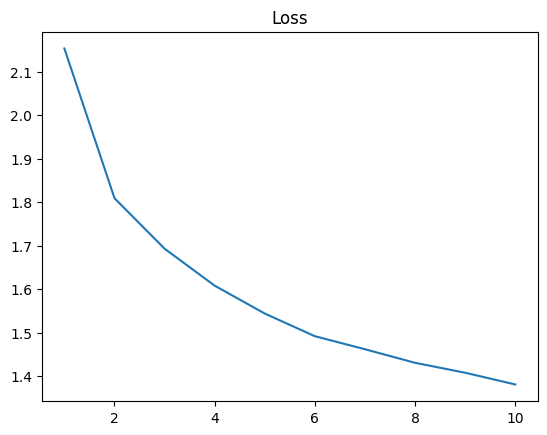

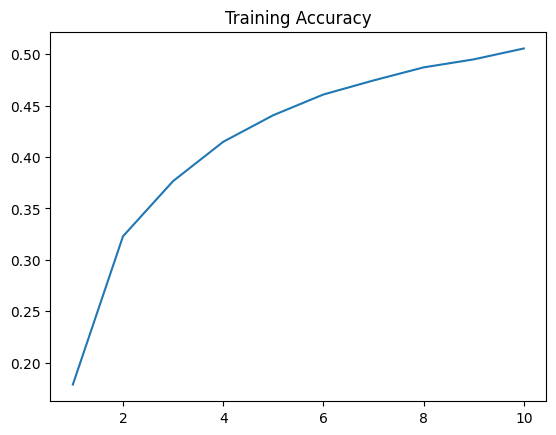

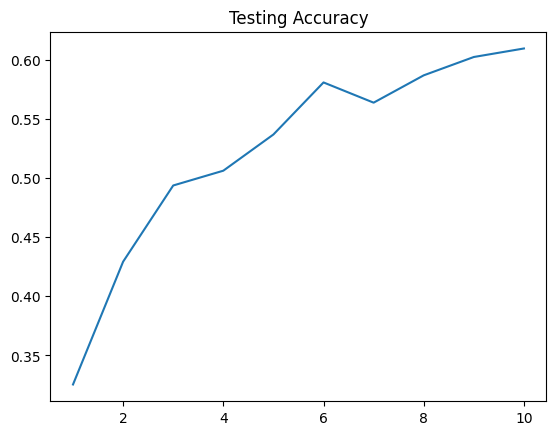

Finished Training


In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


train_transform = transforms.Compose([
    transforms.RandomResizedCrop(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])




trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


class ConvolutionalNN(nn.Module):
    def __init__(self):
        super(ConvolutionalNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)

        self.fc1 = nn.Linear(64 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        c1 = F.relu(self.conv1(input))
        s2 = F.max_pool2d(c1, (2, 2))

        c3 = F.relu(self.conv2(s2))
        s4 = F.max_pool2d(c3, 2)

        c5 = F.relu(self.conv3(s4))
        s6 = F.max_pool2d(c5, 2)

        c7 = F.relu(self.conv4(s6))
        s8 = torch.flatten(c7, 1)

        f9 = F.relu(self.fc1(s8))
        f10 = F.relu(self.fc2(f9))
        output = self.fc3(f10)

        return output


net = ConvolutionalNN()


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


losses, train_accuracies, test_accuracies = [], [], []
epochs = 10


for epoch in range(epochs):
    running_loss = 0.0
    accurate_training = 0
    total_training = 0


    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_training += labels.size(0)
        accurate_training += (predicted == labels).sum().item()

    training_loss = running_loss / len(trainloader)
    training_accuracy = accurate_training / total_training
    losses.append(training_loss)
    train_accuracies.append(training_accuracy)

    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {training_loss:.3f}, Train Accuracy: {training_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')


plt.plot(range(1, epochs + 1), losses)
plt.title("Loss")
plt.show()

plt.plot(range(1, epochs + 1), train_accuracies)
plt.title("Training Accuracy")
plt.show()

plt.plot(range(1, epochs + 1), test_accuracies)
plt.title("Testing Accuracy")
plt.show()


print('Finished Training')

8. Change the loss function from Cross Entropy to Mean Squared Error and report the effect.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 0.090, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 2/10, Loss: 0.090, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 3/10, Loss: 0.090, Train Accuracy: 0.10, Test Accuracy: 0.10
Epoch 4/10, Loss: 0.090, Train Accuracy: 0.10, Test Accuracy: 0.09
Epoch 5/10, Loss: 0.090, Train Accuracy: 0.10, Test Accuracy: 0.09
Epoch 6/10, Loss: 0.090, Train Accuracy: 0.10, Test Accuracy: 0.09
Epoch 7/10, Loss: 0.090, Train Accuracy: 0.10, Test Accuracy: 0.12
Epoch 8/10, Loss: 0.090, Train Accuracy: 0.13, Test Accuracy: 0.15
Epoch 9/10, Loss: 0.090, Train Accuracy: 0.15, Test Accuracy: 0.16
Epoch 10/10, Loss: 0.090, Train Accuracy: 0.14, Test Accuracy: 0.16


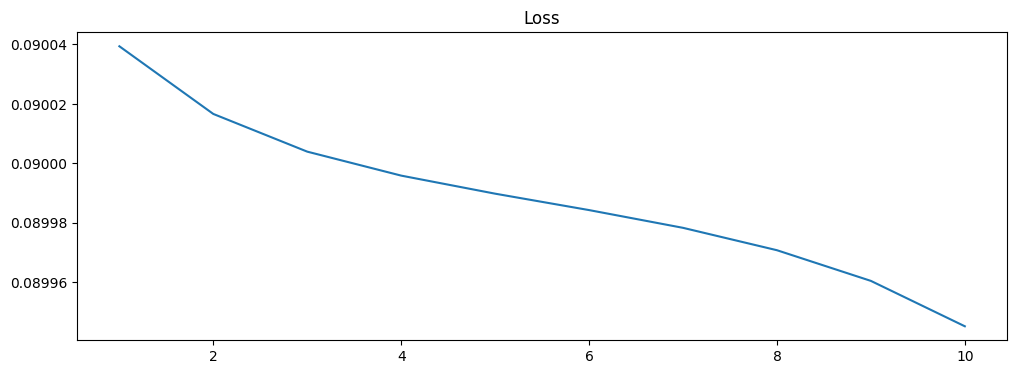

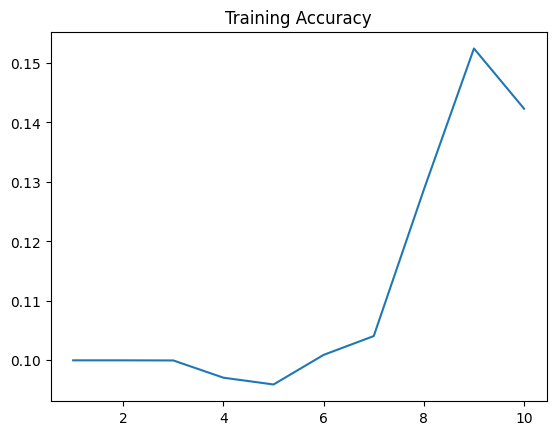

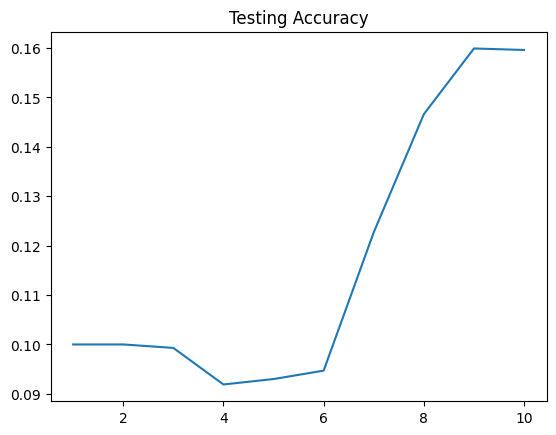

Finished Training


In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class ConvolutionalNN(nn.Module):
    def __init__(self):
        super(ConvolutionalNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        c1 = F.relu(self.conv1(input))
        s2 = F.max_pool2d(c1, (2, 2))
        c3 = F.relu(self.conv2(s2))
        s4 = F.max_pool2d(c3, 2)
        c5 = F.relu(self.conv3(s4))
        s6 = F.max_pool2d(c5, 2)
        c7 = F.relu(self.conv4(s6))
        s8 = torch.flatten(c7, 1)
        f9 = F.relu(self.fc1(s8))
        f10 = F.relu(self.fc2(f9))
        output = self.fc3(f10)
        return output

net = ConvolutionalNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

losses, train_accuracies, test_accuracies = [], [], []
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    accurate_training = 0
    total_training = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        outputs = F.softmax(outputs, dim=1)
        one_hot_labels = F.one_hot(labels, num_classes=10).float()
        loss = criterion(outputs, one_hot_labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_training += labels.size(0)
        accurate_training += (predicted == labels).sum().item()

    training_loss = running_loss / len(trainloader)
    training_accuracy = accurate_training / total_training
    losses.append(training_loss)
    train_accuracies.append(training_accuracy)

    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            outputs = F.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {training_loss:.3f}, Train Accuracy: {training_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')


plt.figure(figsize=(12, 4))


plt.plot(range(1, epochs + 1), losses)
plt.title("Loss")
plt.show()

plt.plot(range(1, epochs + 1), train_accuracies)
plt.title("Training Accuracy")
plt.show()


plt.plot(range(1, epochs + 1), test_accuracies)
plt.title("Testing Accuracy")
plt.show()

print('Finished Training')


For the first few epochs, I saw a pretty low loss of 0.090 and a train and test accuracy of about 10% which is incredibly low. It seems like compared to MSE loss, that cross entropy is the more reliable measure to use when training a model. There was not much improvement that I saw with the train accuracy (change from 10% to 10.65% to 15.26%); with test accuracy, I saw improvement from 10% to 17.27%). I think that if I were to use more epochs (50) compared to the 10 that I used, I would be seeing a better result. Overall, we know that cross entropy works better but there could be another factor due to the fact that I cannot run more than 10 epochs on my computer/Colab. Upon researching, we find that Mean Squared Error is used more for the regression analysis side of machine learning, while cross entropy is better used for classification and measuring the differences between what is predicted and what is the truth. This is why cross entropy is better for this model specifically because the results are more accurate, stable, and consistent.